https://www.kaggle.com/code/melio01/analysis-of-data-and-answering-business-questions/data

Sales Conversion Optimization
About Dataset
Context
Cluster Analysis for Ad Conversions Data

Content
The data used in this project is from an anonymous organisation’s social media ad campaign. The data file can be downloaded from here. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
conversion_data=pd.read_csv('KAG_conversion_data.csv')
conversion_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [ ]:
conversion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [ ]:
conversion_data.shape

(1143, 11)

In [ ]:
conversion_data.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [ ]:
conversion_data.duplicated().sum()

0

In [ ]:
conversion_data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


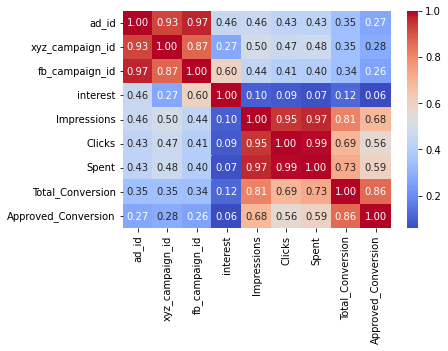

In [ ]:
# correlation heatmap
correlation = conversion_data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')

In [ ]:
print("Number of Companies for campaign : ",len(conversion_data['xyz_campaign_id'].unique()))

Number of Companies for campaign :  3


In [ ]:
categoricals = ['gender']
numericals = ['interest','Impressions ','Clicks','Spent','Total_Conversion','Approved_Conversion','Age','fb_campaign_id',
              'xyz_campaign_id ','ad_id']

In [ ]:
for col in categoricals:
  print(f'value count of col{col} column')
  print(conversion_data[col].value_counts(),'\n')

value count of colgender column
M    592
F    551
Name: gender, dtype: int64 



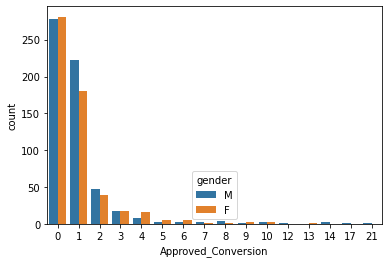

In [ ]:
sns.countplot(data=conversion_data,
            x='Approved_Conversion',
            hue='gender')

In [ ]:
df = conversion_data.groupby(['gender']).agg(
    cust=('Spent','sum')
).reset_index()
df 

,gender,cust
0,F,34502.619963
1,M,24202.609995


In [ ]:
conversion_data.groupby(['gender']).agg(
    cust=('Approved_Conversion','sum')
).reset_index()

,gender,cust
0,F,495
1,M,584


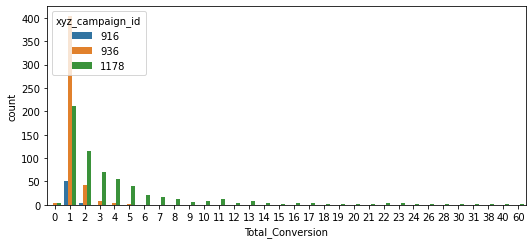

In [ ]:
sns.countplot(data=conversion_data,
            x='Total_Conversion',
            hue='xyz_campaign_id')

In [ ]:
conversion_data.groupby(['xyz_campaign_id']).agg(
    total=('Total_Conversion','sum')
    ).reset_index()

,xyz_campaign_id,total
0,916,58
1,936,537
2,1178,2669


In [ ]:
conversion_data.groupby(['xyz_campaign_id']).agg(
    spent=('Spent','sum')).reset_index()

,xyz_campaign_id,spent
0,916,149.710001
1,936,2893.369999
2,1178,55662.149959


In [ ]:
conversion_data.groupby(['xyz_campaign_id']).agg(
    spent=('Approved_Conversion','sum')).reset_index()

,xyz_campaign_id,spent
0,916,24
1,936,183
2,1178,872


In [ ]:
conversion_data['Cost_per_Click']=(conversion_data['Spent']/conversion_data['Clicks'])*100
conversion_data

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Cost Per Acquisition,Cost_per_Acquisition,Cost_per_Click
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,200.0,200.0,142.999995
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,inf,inf,91.000001
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,inf,inf,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,inf,inf,125.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,100.0,100.0,128.999996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,650.0,650.0,142.138888
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,inf,inf,144.900003
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,inf,inf,143.892855
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,400.0,400.0,147.192593


In [ ]:
conversion_data.groupby(['gender']).agg(
    cust=('Cost_per_Click','sum').reset_index()

SyntaxError: ignored

In [ ]:
conversion_data['Cost_per_Acquisition']=(conversion_data['Total_Conversion']/conversion_data['Approved_Conversion'])*100
conversion_data

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Cost Per Acquisition,Cost_per_Acquisition
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,200.0,200.0
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,inf,inf
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,inf,inf
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,inf,inf
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,650.0,650.0
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,inf,inf
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,inf,inf
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,400.0,400.0


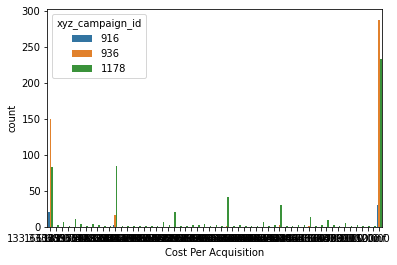

In [ ]:
sns.countplot(data=conversion_data,
            x='Cost Per Acquisition',
            hue='xyz_campaign_id')

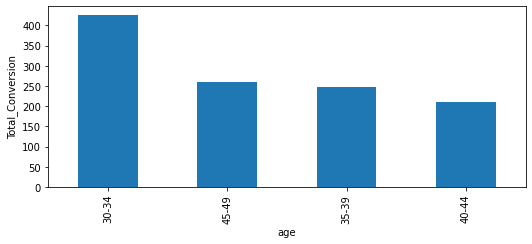

In [ ]:
# Plot for frequency of people in each age group
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

conversion_data['age'].value_counts().plot(ax=ax, kind='bar', xlabel='age', ylabel='Total_Conversion')
plt.show()

In [ ]:
df2 = conversion_data.groupby(['age','gender'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks','Cost_per_Acquisition']].median()
df2

,age,gender,interest,Impressions,Spent,Total_Conversion,Clicks,Cost_per_Acquisition
0,30-34,F,25.0,22572.0,4.620,1.0,4.0,900.0
1,30-34,M,25.0,17954.0,3.200,1.0,2.0,400.0
2,35-39,F,26.0,73676.0,17.300,1.0,12.0,500.0
3,35-39,M,24.0,75804.0,12.680,1.0,8.0,725.0
4,40-44,F,26.0,74424.0,29.670,1.0,19.0,inf
5,40-44,M,23.0,75589.0,15.150,1.0,10.0,300.0
6,45-49,F,24.0,104462.5,38.945,1.0,28.0,inf
7,45-49,M,23.0,101431.0,22.670,1.0,15.0,inf
